In [2]:
import pandas as pd
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Rendu

### Stars by_birthyear

In [3]:
year = 1956
dfStarsByY=pd.read_json(f'http://localhost:8000/stars/by_birthyear/{year}', convert_dates=['birthdate'])
dfStarsByY.set_index('id',inplace=True)
dfStarsByY

,name,birthdate
id,,
527316,Aaron Lustig,1956-01-01
56770,Adriana Barraza,1956-01-01
915511,Aissa Wayne,1956-01-01
2326,Al Sapienza,1956-01-01
1688,Alan Ruck,1956-01-01
...,...,...
915020,Tom Watt,1956-01-01
703618,Veronica Quilligan,1956-01-01
749490,Vyto Ruginis,1956-01-01


### Movies by_title_part

In [4]:
title = 'Die'
dfStars=pd.read_json('http://localhost:8000/movies/by_title/?movie_title=' + title, convert_dates=['birthdate'])
dfStars.set_index('id',inplace=True)
dfStars

,title,year,duration
id,,,
52902,The Horse Soldiers,1959,120
57517,Soldier in the Rain,1963,88
70328,Live and Let Die,1973,121
105698,Universal Soldier,1992,102
106793,Eddie Presley,1992,106
114681,To Die For,1995,106
120347,Tomorrow Never Dies,1997,119
176269,Universal Soldier: The Return,1999,83
246460,Die Another Day,2002,133


### Stats par acteur

In [5]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_stars/')
data_json = response.json()

In [6]:
data_flatten = [ {**director_dict, 'nb_film': nb_film, 'premier_film': pfilm, 'dernier_film': dfilm}  
         for director_dict, nb_film, pfilm, dfilm in data_json ]

In [7]:
dfStatsByStars = pd.DataFrame(data_flatten)
dfStatsByStars

,birthdate,name,id,nb_film,premier_film,dernier_film
0,1907-05-26,John Wayne,78,172,1926,1976
1,1884-03-16,Harrison Ford,1230,86,1915,1932
2,1930-08-25,Sean Connery,125,73,1954,2012
3,1946-07-06,Sylvester Stallone,230,73,1969,2019
4,1956-07-09,Tom Hanks,158,69,1980,2020
...,...,...,...,...,...,...
161,1876-01-01,Fred Parker,662252,10,1932,1939
162,None,Hélène Cardona,136563,10,1993,2018
163,None,Frances McDormand,531,10,1984,2016
164,1924-01-01,Walter Gotell,331770,10,1956,1987


### Répartition par année des films et naissances de star

In [88]:
dfStatsMovieByYear=pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns=['year','movie_count']
dfStatsMovieByYear


,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
101,2016,15
102,2017,22
103,2018,20
104,2019,28


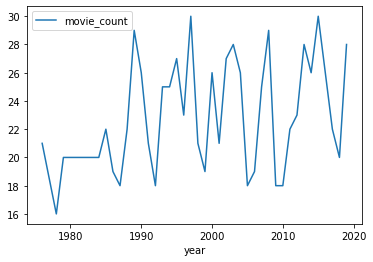

In [89]:
firstGraph=dfStatsMovieByYear[dfStatsMovieByYear.movie_count > 15][['year','movie_count']].set_index('year')
dfCountMovieByYearGraph=firstGraph.plot()

In [90]:
dfStars = pd.read_json('http://localhost:8000/stars', convert_dates = ['birthdate'])
dfStars.set_index('id',inplace=True)
dfStars['year'] = dfStars.birthdate.dt.year
dfStars

,name,birthdate,year
id,,,
1,Fred Astaire,1899-01-01,1899.0
2,Lauren Bacall,1924-01-01,1924.0
3,Brigitte Bardot,1934-01-01,1934.0
4,John Belushi,NaT,NaN
6,Ingrid Bergman,1915-01-01,1915.0
...,...,...,...
11701039,Pam Pruitt-McGeary,NaT,NaN
11722275,Joel Newsom,NaT,NaN
11749099,Elizabeth Alexander,NaT,NaN


In [91]:
dfCountNameByY = dfStars[['year','name']].groupby(['year']).count()
dfCountNameByY

,name
year,
1846.0,1
1848.0,2
1849.0,1
1850.0,1
1851.0,3
...,...
2004.0,1
2005.0,2
2006.0,1


Text(0, 0.5, 'Nombre de stars nées')

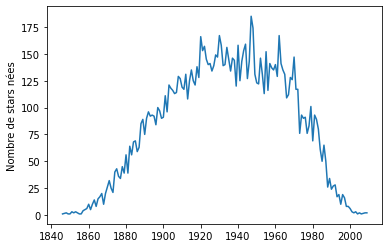

In [92]:
plt.plot(dfCountNameByY.index, dfCountNameByY.name)
plt.ylabel('Nombre de stars nées')

Text(0.5, 1.0, 'Nombre de stars nées par année')

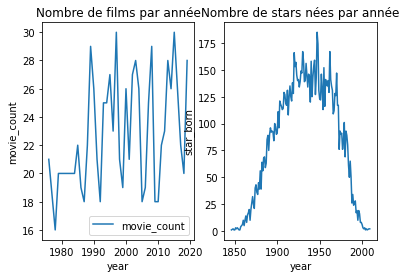

In [93]:
#fig: l'ensemble du dessin
#ax: 1 tracé
fig, (ax1, ax2) = plt.subplots(1,2)
#tracé 1 sur ax1
firstGraph.plot(ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('movie_count')
ax1.set_title('Nombre de films par année')
#tracé 2 sur ax2
ax2.plot(dfCountNameByY.index,dfCountNameByY.name)
ax2.set_xlabel('year')
ax2.set_ylabel('star_born')
ax2.set_title('Nombre de stars nées par année')

### Diagramme barres sur la carrière du top 10 acteurs

In [9]:
response=requests.get('http://localhost:8000/stars/stats_movie_by_stars')
if response.status_code==200:
    print('Response OK')
else:
    print('Error',response.status_code, response.json(), sep=", ")
data_json=response.json()
data_flatten = [{**director_dict, 'movie_count':movie_count, 'min_year':min_year, 'max_year':max_year} for director_dict, movie_count, min_year, max_year in data_json]
data_flatten

Response OK


[{'birthdate': '1907-05-26',
  'name': 'John Wayne',
  'id': 78,
  'movie_count': 172,
  'min_year': 1926,
  'max_year': 1976},
 {'birthdate': '1884-03-16',
  'name': 'Harrison Ford',
  'id': 1230,
  'movie_count': 86,
  'min_year': 1915,
  'max_year': 1932},
 {'birthdate': '1930-08-25',
  'name': 'Sean Connery',
  'id': 125,
  'movie_count': 73,
  'min_year': 1954,
  'max_year': 2012},
 {'birthdate': '1946-07-06',
  'name': 'Sylvester Stallone',
  'id': 230,
  'movie_count': 73,
  'min_year': 1969,
  'max_year': 2019},
 {'birthdate': '1956-07-09',
  'name': 'Tom Hanks',
  'id': 158,
  'movie_count': 69,
  'min_year': 1980,
  'max_year': 2020},
 {'birthdate': '1960-10-18',
  'name': 'Jean-Claude Van Damme',
  'id': 241,
  'movie_count': 66,
  'min_year': 1979,
  'max_year': 2019},
 {'birthdate': '1930-05-31',
  'name': 'Clint Eastwood',
  'id': 142,
  'movie_count': 63,
  'min_year': 1955,
  'max_year': 2018},
 {'birthdate': '1942-07-13',
  'name': 'Harrison Ford',
  'id': 148,
  'movi

In [10]:
dfStatsMovieByStars=pd.DataFrame(data_flatten)
dfStatsMovieByStars.set_index('id',inplace=True)
dfStatsMovieByStars=dfStatsMovieByStars.head(10)
dfStatsMovieByStars

,birthdate,name,movie_count,min_year,max_year
id,,,,,
78,1907-05-26,John Wayne,172,1926,1976
1230,1884-03-16,Harrison Ford,86,1915,1932
125,1930-08-25,Sean Connery,73,1954,2012
230,1946-07-06,Sylvester Stallone,73,1969,2019
158,1956-07-09,Tom Hanks,69,1980,2020
241,1960-10-18,Jean-Claude Van Damme,66,1979,2019
142,1930-05-31,Clint Eastwood,63,1955,2018
148,1942-07-13,Harrison Ford,63,1966,2020
216,1947-07-30,Arnold Schwarzenegger,56,1970,2019


<BarContainer object of 10 artists>

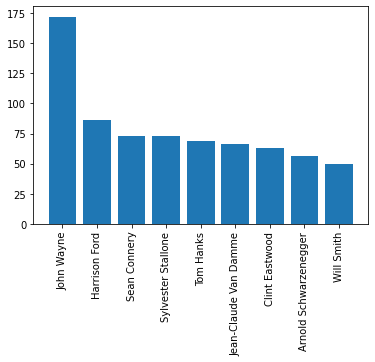

In [15]:
statsToPlot=dfStatsMovieByStars.set_index('name')
plt.xticks(rotation='vertical')
plt.bar(dfStatsMovieByStars['name'],dfStatsMovieByStars['movie_count'])

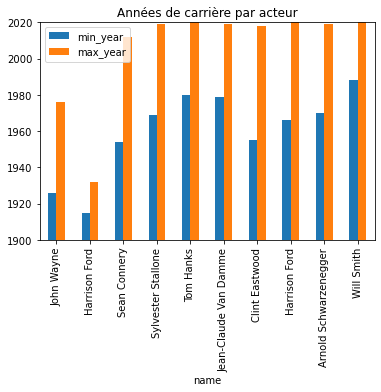

In [21]:
dfTop10ActorsYears = dfStatsMovieByStars[['name', 'min_year', 'max_year']].set_index('name')
dfTop10ActorsYears.plot(kind="bar", ylim=(1900, 2020), title="Années de carrière par acteur")